# **Kegiatan Modul 3**

**Poin penilaian :**

* Tingkat kesesuaian code
* Tingkat kesesuaian output
* Kesesuaian step preprocessing dan pemodelan
* Kesesuaian jawaban dengan konten materi modul
* Pemahaman materi tentang Dropout dan BatchNormalization
* Dapat menerapkan semua konten materi dalam modul-modul sebelumnya
* Kerapian kode program
* Tidak ada error
* Nilai Maksimal 100 poin

## **Introduction**

Dataset yang akan anda gunakan dalam kegiatan ini adalah dataset [Rock Paper Scissors](https://www.kaggle.com/drgfreeman/rockpaperscissors).  Demi mempermudah anda dalam mengerjakan modul ini maka akan sangat disarankan untuk menggunakan [google colab](https://colab.research.google.com/). Anda dapat menggunakan google colab untuk mendownload langsung dataset dari kaggle dan menyimpannya dalam google drive anda. Untuk kenyamanan dan ruang kerja yang besar akan lebih baik anda menggunakan email kampus untuk menyimpan dataset yang anda gunakan. Perhatikan langkah berikut untuk melakukan setting environment anda.

## **Get Your Dataset**

* Mount drive terlebih dahulu

* Untuk dapat mengakses dataset ini anda diharuskan memiliki akun kaggle. Jika belum memilikinya buat satu akun pribadi.

* Download kaggle API.json kemudian upload dalam google drive anda.

* Ubah lokasi direktori kerja anda ke direktori dimana anda menyimpan kaggle.json

* Buka laman dataset kemudian Copy API Command.

* Jalankan perintah untuk mendownload dataset dari kaggle menggunakan google colab.

* Untuk selanjutnya pahami code dibawah dengan baik.

* Gunakan tutorial berikut untuk lebih jelasnya : [Fetch Kaggle Dataset into Google Colab](https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a)


In [ ]:
pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define kaggle json path
# Sesuaikan dengan path anda
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/RESEARCH CENTER/DATASETS"

In [ ]:
# Ubah lokasi direktori kerja
# Sesuaikan dengan path anda
%cd /content/drive/My Drive/RESEARCH CENTER/DATASETS

/content/drive/My Drive/RESEARCH CENTER/DATASETS


Cek apakah api sudah terbaca oleh sistem

In [ ]:
# Cek apakah api sudah terbaca oleh sistem
!ls  

kaggle.json  README_rpc-cv-images.txt  rockpaperscissors


* Paste API Command dari kaggle dataset yang telah anda copy sebelumnya dan tambahkan tanda seru didepannya.
* Pastikan anda menggunakan akun google kampus untuk mendapatkan storage penyimpanan unlimited.
* Lebih disarankan untuk menggunakan google colab karena proses download data lebih cepat dan stabil daripada download manual dan menggunakan jupyter notebook.

In [ ]:
!kaggle datasets download -d drgfreeman/rockpaperscissors

 96% 294M/306M [00:03<00:00, 99.7MB/s]
100% 306M/306M [00:03<00:00, 81.7MB/s]


In [ ]:
# Cek isi direktori kerja dan memastikan dataset telah berhasil didownload.
!ls

kaggle.json


In [ ]:
!unzip \*.zip &> /dev/null && rm *.zip

In [ ]:
# Cek isi direktori kerja untuk memastikan dataset telah berhasil diekstrak.
!ls

kaggle.json  paper  README_rpc-cv-images.txt  rock  rps-cv-images  scissors


## **Prepare Your Data**

### **Soal 1** 
poin 5

---
Terlihat disana bahwa ada file dan folder baru yaitu : `paper, rock, scissors, README_rpc-cv-images.txt`. Untuk tujuan mempermudah aksesabilitas dataset maka akan lebih baik semua folder dataset yang merepresentasikan kelasnya tersebut disimpan dalam satu folder bernama `dataset`. Tugas anda adalah membuat folder baru dan memindahkan semua folder tersebut folder `dataset`.

Selanjutnya, anda akan ditugaskan untuk melakukan splitting dataset menjadi 3 bagian yaitu `train, test, val` oleh sebab itu anda perlu tempat khusus untuk menyimpan ketiga folder tersebut agar penyimpanan anda lebih rapi. Buatlah sebuah folder baru bernama `rockpaperscissors` dan masukkan folder `dataset` kedalamnya. Nanti kita juga akan menyimpan folder `train, test, val` kedalam folder `rockpaperscissors`.

*Ingat google colab juga menerima command berbasis linux.*

In [ ]:
!mkdir dataset

In [ ]:
# TULIS CODE ANDA DISINI
!mv -t dataset paper rock scissors


In [ ]:
# TULIS CODE ANDA DISINI
!mkdir rockpaperscissors
!mv -t rockpaperscissors dataset
!rm -rf rps-cv-images
!rm *.txt

In [ ]:
!pip install split-folders

In [ ]:
!ls rockpaperscissors

dataset


### **Soal 2**  *Opsional*

poin 15

---
Sebelum dataset siap untuk dilakukan proses training anda perlu melakukan splitting dataset menjadi 3 bagian yaitu `train, test, val`. Data `train dan val` akan digunakan ketika anda melakukan training model. Dan data `test` akan anda gunakan ketika anda melakukan prediksi unseen data menggunakan model yang telah anda latih.

* nilai full hanya untuk praktikan yang mampu menerapkan 2 baris code untuk splitting dataset

In [ ]:
base_dir="/content/drive/My Drive/RESEARCH CENTER/DATASETS/rockpaperscissors"
data_dir="/content/drive/My Drive/RESEARCH CENTER/DATASETS/rockpaperscissors/dataset"

In [ ]:
# TULIS CODE ANDA DISINI
import splitfolders
splitfolders.ratio(data_dir, output=base_dir, seed=1337, ratio=(.7,.15,.15),group_prefix=None)


Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:00,  5.19 files/s]
Copying files: 14 files [00:00,  7.29 files/s]
Copying files: 18 files [00:00,  9.26 files/s]
Copying files: 32 files [00:00, 12.85 files/s]
Copying files: 39 files [00:00, 15.61 files/s]
Copying files: 51 files [00:00, 20.85 files/s]
Copying files: 64 files [00:01, 27.83 files/s]
Copying files: 73 files [00:01, 31.12 files/s]
Copying files: 86 files [00:01, 38.13 files/s]
Copying files: 98 files [00:01, 47.83 files/s]
Copying files: 107 files [00:01, 53.60 files/s]
Copying files: 121 files [00:01, 58.92 files/s]
Copying files: 134 files [00:01, 70.48 files/s]
Copying files: 144 files [00:02, 68.87 files/s]
Copying files: 153 files [00:02, 67.16 files/s]
Copying files: 165 files [00:02, 77.26 files/s]
Copying files: 175 files [00:02, 75.67 files/s]
Copying files: 186 files [00:02, 73.14 files/s]
Copying files: 200 files [00:02, 84.40 files/s]
Copying files: 210 files [00:02, 78.85 files/s]
Copying 

In [ ]:
ls rockpaperscissors

dataset/  test/  train/  val/


## **Data Preprocessing**

Kita anggap dataset yang kita miliki merupakan dataset yang telah bersih dan siap digunakan untuk proses training model. Namun agar data yang kita miliki dapat diproses oleh model maka kita perlu melakukan sedikit pengolahan data. Kita perlu melakukan load dataset yang tersimpan dalam folder-folder kelas menggunakan generator dan melakukan sedikit proses augmentasi sederhana. 


**NOTE :** Penjelasan augmentasi secara detail akan dibahas pada modul selanjutnya. Disini kita akan mengunakan augmentasi sederhana saja seperti resize, flip dan rotation.

### **Soal 3**
poin 20

---

Lakukan proses agumentasi sederhana dan setting dataset menggunakan generator dengan ketentuan **WAJIB** menyertakan proses berikut :

* Resize
* Rescaling
* Color Mode
* Shuffle
* Class Mode

Terapkan semua proses diatas pada data `train, test dan validation`.


In [ ]:
# Definisikan path untuk data train test dan validation
# sesuaikan dengan path anda
train_path = os.path.join(base_dir,'train')
test_path  = os.path.join(base_dir,'test')
val_path   = os.path.join(base_dir,'val')

In [ ]:
# TULIS KODE ANDA DISINI
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
Batch_size=32
augmen_gen = ImageDataGenerator(rescale=1. / 255,
                            rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

train_gen = augmen_gen.flow_from_directory(
    train_path,
    class_mode = 'categorical',
    shuffle=True,
    target_size = (224,224),
    batch_size=Batch_size,
    color_mode ='rgb'
)

val_gen = augmen_gen.flow_from_directory(
    val_path,
    class_mode = 'categorical',
    shuffle=True,
    target_size = (224,224),
    batch_size=Batch_size,
    color_mode ='rgb'
)

test_gen = augmen_gen.flow_from_directory(
    test_path,
    class_mode = 'categorical',
    shuffle=False,
    target_size = (224,224),
    batch_size=Batch_size,
    color_mode ='rgb',
)

Found 1531 images belonging to 3 classes.
Found 326 images belonging to 3 classes.
Found 331 images belonging to 3 classes.


## **Definisikan Model CNN**

Sangat disarankan menggunakan GPU sebagai akselerator untuk mempercepat proses training. Oleh sebab itu akan sangat lebih baik bila menggunakan google colab dimana anda dapat meminjam GPU dari google secara gratis.

### **Soal 4**
poin 60

---

Definisikan model CNN anda sebaik mungkin, model dan evaluasi yang anda bangun **WAJIB** memenuhi kriteria berikut:

* Menerapkan proses Convolution 
* Menerapkan proses Pooling
* Menerapkan Dropout
* Menerpakan BatchNormalization
* Evaluasi model menggunakan grafik loss dan accuracy
* Evaluasi menggunakan classification report
* Evaluasi menggunakan confusion matrix

Bila anda telah melaksanakan semua item-item wajib diatas maka anda bisa mendapatkan penilaian yang sesuai dengan kriteria penilaian sbb: ***Bila tidak menerapkan salah satu dari item wajib maka penilaian di soal ini dianggap gugur***

* Akurasi < 50% Nilai Max 20
* Akurasi < 80% Nilai Max 30
* Akurasi >= 80% Nilai Max 40

Opsional untuk mendapatkan nilai tambah :
* Menggunakan Callbacks  **Poin tambahan 5 poin**
* Menggunakan Learning Rate  **Poin tambahan 5 poin**
* Lakukan prediksi dengan data test, pastikan model anda dapat memprediksi unseen data dengan kelas yang benar ***dengan ketentuan dapat menampilkan gambar dan label prediksi dan probability score dari gambar yang diprediksikan***. **Poin tambahan 15 poin**
* **Nilai tambahan 15 poin** apabila lama proses training model tidak lebih dari 15 menit dengan akurasi >90%

In [ ]:
# IMPORT SEMUA PAKET YANG ANDA PERLUKAN UNTUK MENDEFINISIKAN MODEL DISINI
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
import time

In [ ]:
# DEFINISIKAN MODEL ANDA DISINI
model = Sequential()

model.add(InputLayer(input_shape=[224,224,3]))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

In [ ]:
# TULIS CODE UNTUK MENAMPILKAN SUMMARY DARI ARSITEKTUR MODEL ANDA DISINI
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 128)       0

In [ ]:
# TULIS CODE CALLBACKS ANDA DISINI
best_model_path = 'best_model.h5'
checkpoint_callback = ModelCheckpoint(best_model_path,
                                     monitor='val_accuracy',
                                     save_best_only=True,
                                     verbose=1)
reduce_callback = ReduceLROnPlateau(monitor='val_accuracy', patience=3, factor=0.5, min_lr=0.000003, verbose=1)
callbacks_list = [checkpoint_callback, reduce_callback]

# early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
# TULIS CODE UNTUK DEFINISI LEARNING RATE DISINI 
learning_rate=0.00001

In [ ]:
# TULIS CODE UNTUK TRAINING DISINI
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=learning_rate),
             metrics='accuracy')


In [ ]:
# TULIS CODE UNTUK MENCETAK LAMA TRAINING TIME DISINI
start = time.time()
H = model.fit_generator(train_gen, epochs=25,validation_data=val_gen, validation_steps = 4, verbose=1, callbacks=[callbacks_list])

End = time.time()
print ("training time: ", End-start,"s")

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
48/48 [==============================] - ETA: 0s - loss: 1.1837 - accuracy: 0.4370
Epoch 00001: val_accuracy improved from -inf to 0.36719, saving model to best_model.h5
48/48 [==============================] - 26s 536ms/step - loss: 1.1837 - accuracy: 0.4370 - val_loss: 1.0727 - val_accuracy: 0.3672
Epoch 2/25
48/48 [==============================] - ETA: 0s - loss: 0.9924 - accuracy: 0.5284
Epoch 00002: val_accuracy improved from 0.36719 to 0.52344, saving model to best_model.h5
48/48 [==============================] - 27s 569ms/step - loss: 0.9924 - accuracy: 0.5284 - val_loss: 1.0622 - val_accuracy: 0.5234
Epoch 3/25
48/48 [==============================] - ETA: 0s - loss: 0.8954 - accuracy: 0.5976
Epoch 00003: val_accuracy improved from 0.52344 to 0.65625, saving model to best_model.h5
48/48 [==============================] - 27s 555ms/step - loss: 0.8954 - accuracy: 0.5976 - val_loss: 1.0316 - 

# **Evaluate**

In [ ]:
# IMPORT SEMUA PAKET YANG ANDA PERLUKAN UNTUK MENGEVALUASI MODEL DISINI
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# TULIS CODE UNTUK EVALUASI MODEL DISINI

model.load_weights(best_model_path)

ypred = model.predict(test_gen)
predictions = np.argmax(ypred, axis = 1)
# labels = (pred > 0.5).astype(np.int)
print(classification_report(test_gen.classes,predictions))

NameError: ignored

Confusion matrix, without normalization
[[ 93   9   6]
 [  5 104   1]
 [ 11   7  95]]


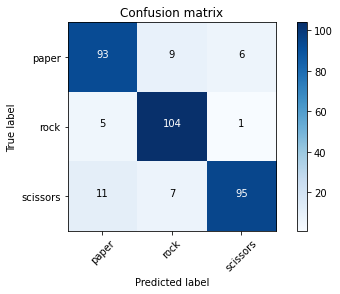

In [ ]:
# TULIS CODE UNTUK PLOT EVALUASI MODEL DISINI
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix=confusion_matrix(test_gen.classes,predictions)
plot_confusion_matrix(cnf_matrix, classes=test_gen.class_indices)

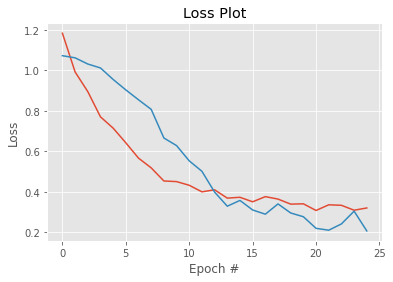

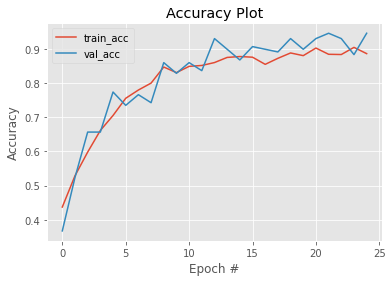

In [ ]:
# TULIS CODE UNTUK PREDIKSI DATA TEST DISINI
plt.style.use("ggplot")

plt.plot(np.arange(0, 25), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 25), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

plt.plot(np.arange(0, 25), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 25), H.history["val_accuracy"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


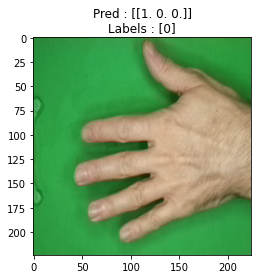

In [ ]:
# TULIS CODE UNTUK PREDIKSI DATA TEST DISINI
import PIL

def predictModel(image_path):
    # Load and resize the image using PIL.
    img = PIL.Image.open(image_path)
    img_resized = img.resize((224, 224), PIL.Image.LANCZOS)

    # Plot the image.
    plt.imshow(img_resized)

    # Convert the PIL image to a numpy-array with the proper shape.
    img_array = np.expand_dims(np.array(img_resized), axis=0)

    pred_coba = model.predict_classes(img_array)
    ahoy = model.predict(img_array)
    
    labels = np.argmax(ahoy, axis=1)

    plt.title(f"Pred : {ahoy}\nLabels : {labels}")

predictModel("/content/drive/My Drive/RESEARCH CENTER/DATASETS/rockpaperscissors/test/paper/Di7hVJMSS3DzbSTi.png")